In [44]:
import pandas as pd
import regex as re
import string
from matplotlib import pyplot as plt

In [35]:
df = pd.read_pickle("./Data/MovieSummaries/plots_genres.pkl")
print(len(df))

df = df[~df['genre'].apply(lambda x: len(x) == 0)]

# Explode the list of lists into separate rows
df_exploded = df.explode('genre')

# Count the occurrences of each string
result = df_exploded['genre'].value_counts().reset_index()

# Rename the columns for better clarity
result.columns = ['String', 'Count']



less_25 = result[result['Count']<400]
less_25_list = less_25['String'].tolist()
less_25

df[df['genre'].apply(lambda x: any(target in x for target in less_25_list))]

df['genre'] = df['genre'].apply(lambda x: [item for item in x if item not in less_25_list])


#remove all rows with empty genre
df = df[~df['genre'].apply(lambda x: len(x) == 0)]

42204


In [36]:
len(df)

41454

In [37]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    # Remove extra spaces
    text = re.sub(r' +', ' ', text)
    #remove leading and trailing spaces
    text = text.strip()
    return text

In [38]:
#write as function
def preprocess_genre(genre):
    genre = [preprocess_text(genre) for genre in genre]
    genre = [re.sub(r'\b(film|films|movie|movies|cinema|\'s)\b', '', genre) for genre in genre]
    genre = [genre.strip() for genre in genre]
    return genre

In [39]:
df['genre'] = df['genre'].apply(lambda x: preprocess_genre(x))

In [40]:
#reduce categories
unique_categories = list(set([category for sublist in df['genre'] for category in sublist]))

#remove empty strings
unique_categories = [category for category in unique_categories if category != '']

unique_categories


['period piece',
 'family drama',
 'crime fiction',
 'childrens',
 'slapstick',
 'japanese',
 'cult',
 'mystery',
 'silent',
 'romance',
 'biography',
 'adaptation',
 'childrensfamily',
 'noir',
 'television',
 'western',
 'family',
 'martial arts',
 'thriller',
 'action',
 'suspense',
 'short',
 'adventure',
 'lgbt',
 'teen',
 'supernatural',
 'action thrillers',
 'indie',
 'coming of age',
 'documentary',
 'blackandwhite',
 'drama',
 'chinese',
 'comedy',
 'horror',
 'comedydrama',
 'crime thriller',
 'actionadventure',
 'world',
 'biographical',
 'musical',
 'fantasy',
 'war',
 'romantic comedy',
 'romantic drama',
 'black comedy',
 'science fiction',
 'satire',
 'political drama',
 'psychological thriller',
 'sports',
 'animation',
 'slasher',
 'parody',
 'bollywood',
 'melodrama']

In [41]:
#clustering with TF-IDF (Term Frequency-Inverse Document Frequency) vectorization process in the provided code converts textual data (in this case, movie category names) into numerical vectors. 


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Extract category names
category_names = [category for category in unique_categories]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the category names using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(category_names)

# Perform K-means clustering with n clusters
kmeans = KMeans(n_clusters=15)
kmeans.fit(tfidf_matrix)

# Get the cluster labels for each category
cluster_labels = kmeans.labels_

# Create a dictionary to group categories by their cluster label
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(category_names[i])

# Print the movie categories grouped by "over genres"
for cluster_label, cluster_categories in clusters.items():
    print(f"Over Genre {cluster_label + 1}:")
    print(", ".join(cluster_categories))
    print()

Over Genre 1:
period piece

Over Genre 3:
family drama, family, drama, romantic drama, political drama

Over Genre 6:
crime fiction, science fiction

Over Genre 2:
childrens, japanese, cult, romance, biography, childrensfamily, noir, television, western, martial arts, suspense, short, adventure, lgbt, teen, supernatural, coming of age, documentary, blackandwhite, horror, comedydrama, actionadventure, biographical, musical, fantasy, satire, sports, animation, slasher, parody, bollywood, melodrama

Over Genre 15:
slapstick

Over Genre 4:
mystery

Over Genre 7:
silent

Over Genre 14:
adaptation

Over Genre 8:
thriller, crime thriller, psychological thriller

Over Genre 13:
action, action thrillers

Over Genre 10:
indie

Over Genre 12:
chinese

Over Genre 5:
comedy, romantic comedy, black comedy

Over Genre 11:
world

Over Genre 9:
war



c:\anaconda3\envs\nlp-project\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


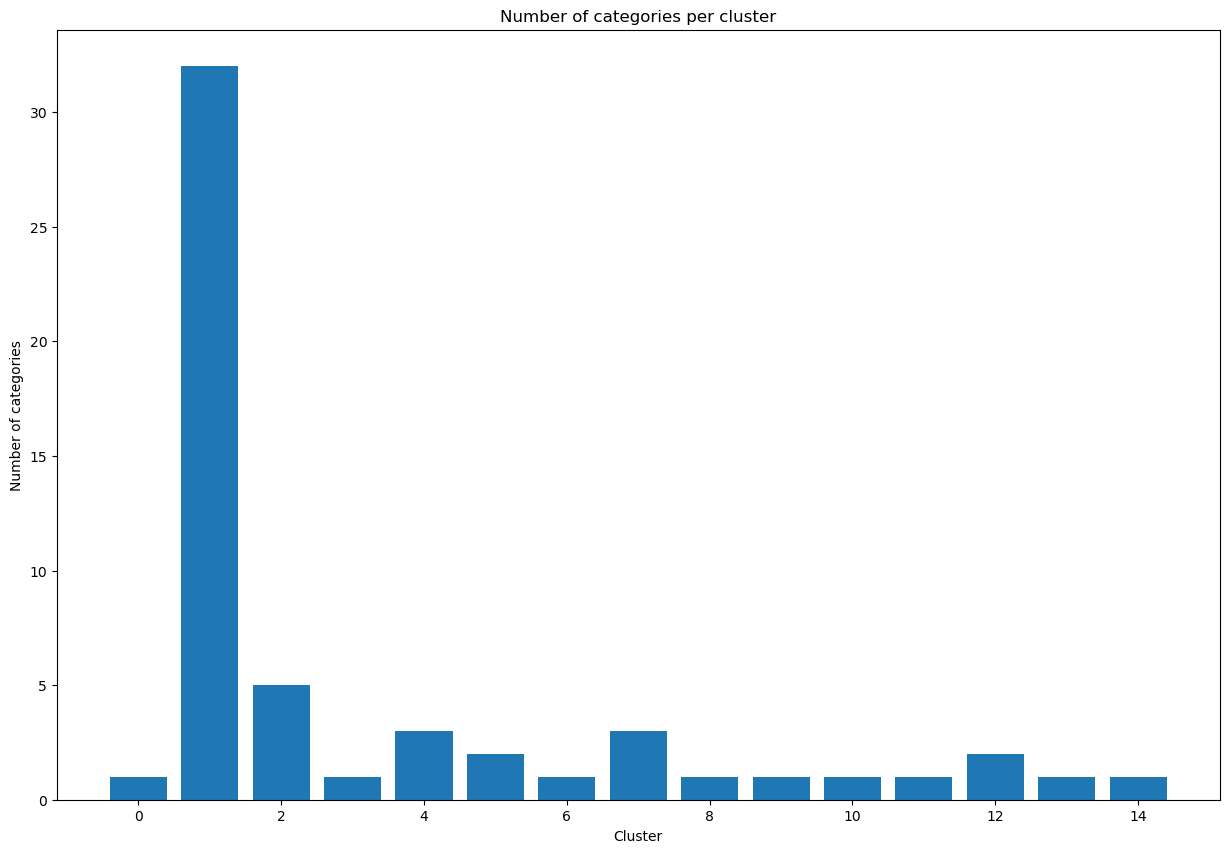

In [45]:
#show balance of clusters
plt.figure(figsize=(15,10))
plt.bar(clusters.keys(), [len(cluster) for cluster in clusters.values()])
plt.title('Number of categories per cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of categories')
plt.show()